In [31]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [32]:
# Create list of all targets (minus background noise)
#words available to us as the data set
dataset_path = 'D:\wake word detection\data set for wake word detection'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
all_targets.remove('_background_noise_')
print(all_targets)

['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero']


In [33]:
# Settings
#linking the feature set file that we created
feature_sets_path = r"C:\Users\Apoorv singh negi\all_targets_mfcc_sets.npz"
feature_sets_filename = 'all_targets_mfcc_sets.npz' #saving the neural network model to a file when we are done
model_filename = 'wake_word_stop_model.h5'
wake_word = 'stop'

In [34]:
# Load feature sets
feature_sets = np.load(r"C:\Users\Apoorv singh negi\all_targets_mfcc_sets.npz")
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [35]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [36]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(7802, 16, 16)
(967, 16, 16)
(982, 16, 16)


In [37]:
# Peek at labels
print(y_val)

[14.  5. 22. 13. 30.  9. 34. 22. 33. 12.  9. 20. 23. 17. 20.  5. 26. 34.
  6. 33. 31. 15. 10. 21.  6.  7. 11. 11. 20. 16. 22. 21. 14. 11. 30. 29.
  3. 10. 10. 31. 23. 22. 24. 13. 11. 17.  7. 30. 22.  5. 10. 18. 11.  8.
 34. 17. 33. 25. 20. 19. 24.  6.  7. 32. 20. 10. 30. 26.  4. 23.  2. 22.
 21. 19. 25. 15.  5.  6. 29. 23. 15. 10. 11. 30.  5. 10.  7. 22. 27.  5.
  6. 27. 15. 29. 24. 20. 31. 29. 19. 29. 19.  5.  5. 20. 27. 30.  2. 25.
 12. 32. 33.  7. 19.  6. 21. 21.  4.  9. 25.  1. 25.  7.  1.  4. 15. 22.
 27. 25.  7. 34. 30. 26. 23. 17.  5. 18.  4. 21. 34. 17.  5. 10. 10. 17.
 13. 15.  7. 22. 30. 15. 25. 27.  2. 26.  5. 27. 23. 10. 32. 13. 21. 33.
 27. 17. 32.  2. 29.  7.  0. 22.  4. 14.  1. 27. 23. 26. 25. 21. 16. 17.
 24. 15.  1. 32.  2. 17. 20. 17.  7. 33. 18. 34.  5. 30. 25.  7.  0. 11.
  7.  7. 19. 29. 15. 33. 20. 21. 11.  7. 24. 25. 31. 30. 22. 21. 19. 21.
 29. 18.  0. 15. 25.  4.  6. 26.  4. 12.  5. 15. 34. 15. 13. 16. 21. 20.
 23. 18. 33. 10. 23. 12. 24.  5.  5.  5. 15. 25. 29

In [38]:
# Convert ground truth arrays to one wake word (1) and 'other' (0)
#find index of our target word stop
#np.equal gives us true and false so we convert it to 0 and 1 number using float64
wake_word_index = all_targets.index(wake_word)
y_train = np.equal(y_train, wake_word_index).astype('float64')
y_val = np.equal(y_val, wake_word_index).astype('float64')
y_test = np.equal(y_test, wake_word_index).astype('float64')

In [39]:
#stop label having value '1' and other having value '0'
# Peek at labels after conversion
print(y_val)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.

In [40]:
# What percentage of 'stop' appear in validation labels
print(sum(y_val) / len(y_val))
print(1 - sum(y_val) / len(y_val))

0.038262668045501554
0.9617373319544984


In [41]:

# View the dimensions of our input data
print(x_train.shape)

(7802, 16, 16)


In [42]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
#add '1' as the fourth dimension of the input of the image 
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(7802, 16, 16, 1)
(967, 16, 16, 1)
(982, 16, 16, 1)


In [43]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(16, 16, 1)


In [45]:
# Build model
# Based on: https://www.geeksforgeeks.org/python-image-classification-using-keras/
#three convolutional layer with relu activation function and max_pooling function
model = models.Sequential()
model.add(layers.Conv2D(32, 
                        (2, 2), 
                        activation='relu',
                        input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [46]:
# Display model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 15, 15, 32)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 32)          4128      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 64)          8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

In [48]:
# Add training parameters to model
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc']) #record metrics during training that could be helpful later

In [49]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=30, 
                    batch_size=100, 
                    validation_data=(x_val, y_val))

Epoch 1/30
79/79 [==============================] - 4s 13ms/step - loss: 0.2565 - acc: 0.9357 - val_loss: 0.1585 - val_acc: 0.9617
Epoch 2/30
79/79 [==============================] - 1s 10ms/step - loss: 0.1640 - acc: 0.9583 - val_loss: 0.1342 - val_acc: 0.9617
Epoch 3/30
79/79 [==============================] - 1s 10ms/step - loss: 0.1346 - acc: 0.9621 - val_loss: 0.1732 - val_acc: 0.9617
Epoch 4/30
79/79 [==============================] - 1s 10ms/step - loss: 0.1191 - acc: 0.9623 - val_loss: 0.0939 - val_acc: 0.9659
Epoch 5/30
79/79 [==============================] - 1s 10ms/step - loss: 0.1086 - acc: 0.9643 - val_loss: 0.0892 - val_acc: 0.9710
Epoch 6/30
79/79 [==============================] - 1s 10ms/step - loss: 0.0970 - acc: 0.9701 - val_loss: 0.1673 - val_acc: 0.9628
Epoch 7/30
79/79 [==============================] - 1s 11ms/step - loss: 0.0875 - acc: 0.9720 - val_loss: 0.1054 - val_acc: 0.9690
Epoch 8/30
79/79 [==============================] - 1s 11ms/step - loss: 0.0832 - a

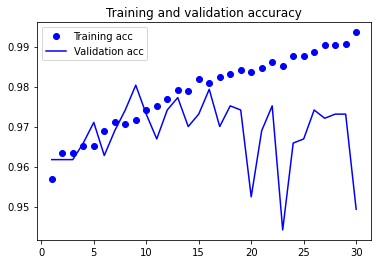

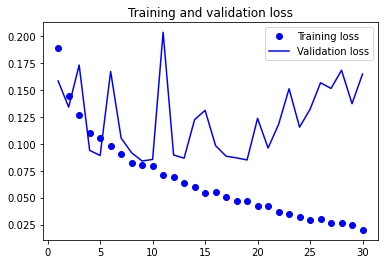

In [50]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [51]:
# Save the model as a file
models.save_model(model, model_filename)

In [52]:
# See which are 'stop'
for idx, y in enumerate(y_test):
    if y == 1:
        print(idx)

19
66
69
98
119
161
165
292
327
344
349
350
392
427
437
491
499
500
517
526
566
586
598
616
617
642
702
706
761
783
810
817
862
874
876
910
946
947


In [54]:
# TEST: Load model and run it against test set
#consider above 0.5 as our target wake word or stop
model = models.load_model(model_filename)
for i in range(110, 120):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

Answer: 0.0  Prediction: [[2.2715378e-12]]
Answer: 0.0  Prediction: [[0.01637837]]
Answer: 0.0  Prediction: [[7.729828e-06]]
Answer: 0.0  Prediction: [[7.5884776e-10]]
Answer: 0.0  Prediction: [[1.1602997e-14]]
Answer: 0.0  Prediction: [[0.13910878]]
Answer: 0.0  Prediction: [[0.00105801]]
Answer: 0.0  Prediction: [[1.4907928e-06]]
Answer: 0.0  Prediction: [[3.3535839e-15]]
Answer: 1.0  Prediction: [[0.93134403]]


In [55]:
# Evaluate model with test set
#here the accuracy must be close to the validation accuracy
#95% accurate is predicting whether the 1 sec clip is our target wake word stop or not
model.evaluate(x=x_test, y=y_test)

31/31 [==============================] - 0s 1ms/step - loss: 0.1382 - acc: 0.9552


[0.13815420866012573, 0.9551934599876404]